In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Canny edge detection

In [2]:
def edge_detection(image):
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  edges=cv2.Canny(gray, 50,150)
  return edges

# Hough Transform

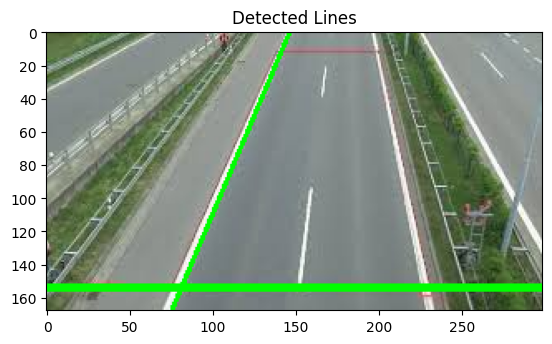

In [11]:
def hough_transform(edges):
    height, width = edges.shape
    max_rho = int(np.hypot(height, width))
    thetas = np.deg2rad(np.arange(-90, 90))
    rhos = np.linspace(-max_rho, max_rho, 2 * max_rho)

    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.int32)

    y_indices, x_indices = np.nonzero(edges)

    for i in range(len(x_indices)):
        x = x_indices[i]
        y = y_indices[i]
        for t_idx, theta in enumerate(thetas):
            rho = int(x * np.cos(theta) + y * np.sin(theta)) + max_rho
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

def find_lines(accumulator, rhos, thetas, threshold):
    lines = []
    for rho_idx, theta_idx in np.argwhere(accumulator > threshold):
        rho = rhos[rho_idx]
        theta = thetas[theta_idx]
        lines.append((rho, theta))
    return lines

def draw_lines(image, lines):
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image

image = cv2.imread('/content/WhatsApp Image 2024-09-29 at 22.01.16_e3b49a49.jpg')
edges = edge_detection(image)
accumulator, thetas, rhos = hough_transform(edges)
lines = find_lines(accumulator, rhos, thetas, threshold=150)

output_image = draw_lines(image, lines)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()
